# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")
    
data.shape

Wholesale customers dataset has 440 samples with 6 features each.


(440, 6)

In [2]:
data.head(5)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [59]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [21]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [0, 200, 435]

#print(data.loc[0,'Milk'])

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)


Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,3067,13240,23127,3941,9959,731
2,29703,12051,16027,13135,182,2204


([<matplotlib.axis.XTick at 0x7fb6343acc50>,
 <a list of 3 Text xticklabel objects>)

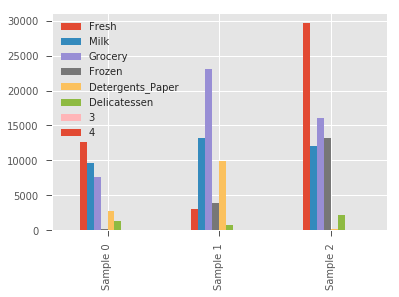

In [22]:
import matplotlib.pyplot as plt
samples_cpy = samples.copy()
samples_cpy[samples.shape[0]] = data.median()
samples_cpy[samples.shape[0]+1] = data.mean()

plt.style.use('ggplot')
samples_cpy.plot(kind='bar')
labels = ["Sample {}".format(i) for i in samples.index]
labels.append("Data Median")
labels.append("Data Mean")
plt.xticks(range(samples_cpy.shape[0]),labels)

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 3071.9
* Frozen: 3071.93
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:
The first customer (index 0): This customer purchased a lot extra on "Milk" and "Grocery", and purchased less on "Frozen" if you compare to the mean values. I think it could be a dairy home made product shop. 


The second customer (index 200): This customer purchased a lot extra on "Milk" and "Grocery" and "Detergents Paper", and purchased less on  "Fresh" and "Delicatenssen". This could be a milk product factory.


The third customer (index 435): This cusotmer purchase a lot on "Fresh", "Milk", "Grocery" and "Frozen", and purchase less on "Detergents Paper". This could be a midium size of local market since this customer spent a lot money on the items way more than the average.**

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [60]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature

new_data =  data.drop(['Milk'], axis = 1, inplace = False)

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data, data['Milk'], test_size=0.25, random_state=42)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print(score)

0.156275395017


   Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669   9656     7561     214              2674          1338
1   3067  13240    23127    3941              9959           731
2  29703  12051    16027   13135               182          2204
[[ 0.05293319  0.52356777 -0.04111489 -0.58936716 -0.04356873 -0.06633906]
 [-0.70714272  1.00973259  1.59873061  0.1792206   1.48611147 -0.28182421]
 [ 1.40131197  0.84844632  0.85076048  2.07522161 -0.56683065  0.24109116]]


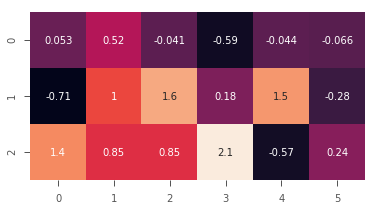

In [24]:
import seaborn as sns

from sklearn.preprocessing import StandardScaler

ssc = StandardScaler()
ssc.fit(data)
sns.heatmap(ssc.transform(samples), annot=True, cbar=False, square=True)
print(samples)
print(ssc.transform(samples))

### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:
1. I attempt to predict "Milk" feature.
2. The score is 0.156275395017.
3.  I think 0.15 it pretty low, which means that this feature could not be predicted by other features and this feature does not follow the latent pattern of the dataset. So I would believe this "Milk" feature is important and necessary for identifying the result.


4. QUESTION --- : When I use 'Fresh', I get negative value. I am wondering what does negative value mean? Does that mean it is worse than 0? If I get a -2 and -4, which one is worse? I would assume that the -4 is actually better since it acutally goes the totally opposite direction from other features. Can we say that we can predict this feature by other features?

ANS from Mentors: If you pass in a vector of the mean value as your prediction you get an R^2 of 0. Thus, an R^2 of less than zero means worse than the mean. The range of R^2 values are (-infty, 1].
**


In [25]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

def calculate_r_2_for_feature(data,feature):
    new_data = data.drop(feature, axis=1)

    X_train, \
    X_test,  \
    y_train, \
    y_test = train_test_split(
        new_data,data[feature],test_size=0.25
    )

    regressor = DecisionTreeRegressor()
    regressor.fit(X_train,y_train)

    score = regressor.score(X_test,y_test)
    return score

def r_2_mean(data,feature,runs=200):
    return np.array([calculate_r_2_for_feature(data,feature)
                     for _ in range(200) ]).mean().round(4)

print("Fresh: ", r_2_mean(data,'Fresh'))
print("Milk: ", r_2_mean(data,'Milk'))
print("Grocery: ", r_2_mean(data,'Grocery'))
print("Frozen: ", r_2_mean(data,'Frozen'))
print("Detergents_Paper: ", r_2_mean(data,'Detergents_Paper'))
print("Delicatessen: ", r_2_mean(data,'Delicatessen'))


#print "{0:17} {1}".format("Fresh: ", r_2_mean(data,'Fresh'))
#print "{0:17} {1}".format("Milk: ", r_2_mean(data,'Milk'))
#print "{0:17} {1}".format("Grocery: ", r_2_mean(data,'Grocery'))
#print "{0:17} {1}".format("Frozen: ", r_2_mean(data,'Frozen'))
#print "{0:17} {1}".format("Detergents_Paper: ", r_2_mean(data,'Detergents_Paper'))
#print "{0:17} {1}".format("Delicatessen: ", r_2_mean(data,'Delicatessen'))

Fresh:  -0.8588
Milk:  0.058
Grocery:  0.6678
Frozen:  -1.4142
Detergents_Paper:  0.6613
Delicatessen:  -3.2209


### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


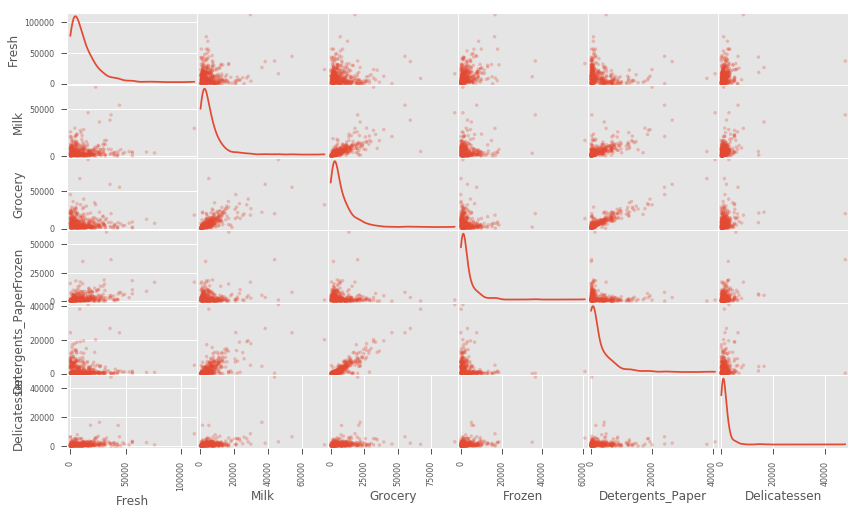

In [26]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');




                     Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
Fresh             1.000000  0.100510 -0.011854  0.345881         -0.101953   
Milk              0.100510  1.000000  0.728335  0.123994          0.661816   
Grocery          -0.011854  0.728335  1.000000 -0.040193          0.924641   
Frozen            0.345881  0.123994 -0.040193  1.000000         -0.131525   
Detergents_Paper -0.101953  0.661816  0.924641 -0.131525          1.000000   
Delicatessen      0.244690  0.406368  0.205497  0.390947          0.069291   

                  Delicatessen  
Fresh                 0.244690  
Milk                  0.406368  
Grocery               0.205497  
Frozen                0.390947  
Detergents_Paper      0.069291  
Delicatessen          1.000000  


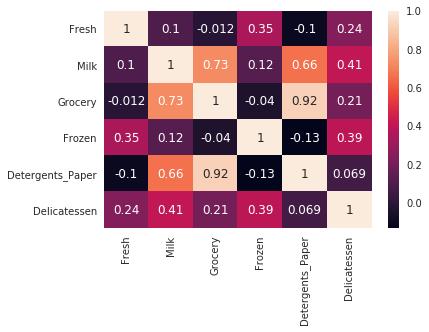

In [61]:
import seaborn as sns; sns.set()
uniform_data = data.corr()
print(uniform_data)
ax = sns.heatmap(uniform_data, annot = True)

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html) (the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:
1. If you look at all 6 features, all of them are having a large amount of the data at the place near 0. Therefore I think the distributions for all the 6 features seem to be very skewed. Because they are all in skewed shape, they are definitely not following the normal distribution pattern. The small value of the data is the majority. Even though you can still see some large value data for each feature, they are just few and just the minors. So I think we could see those large value data poitns as outliers.

2. From the scatter matrix above, it looks like ("Milk", "Grocery"), ("Milk","Detergents Paper") and ("Detergents Paper", "Grocery") those three pairs show soem degree of correlation.
3. It denies my theory I describe on Question 2. I thought that Milk is not relavant to other features by looking at the score with only 0.15. However, based on the scatter matrix plot, it shows that Milk feature is relavant to Grocery and Detergents Paper. I think maybe 0.15 is actually high enough to say this feature is having some correlation with other features.
4. Those features seem to be distributed skewed and gathering at the place near 0. If you look at the heatmap, the "Grocery" and "Detergents Paper" has correlation of 0.92, which is very high. This is also proved on the scatter plot above. But still, the distribution of the data is still skewed and the majority of the points are gathering at the place near 0.
**

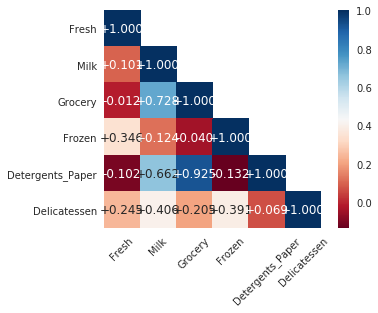

In [62]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True,
                     cmap='RdBu', fmt='+.3f')
    plt.xticks(rotation=45, ha='center')

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


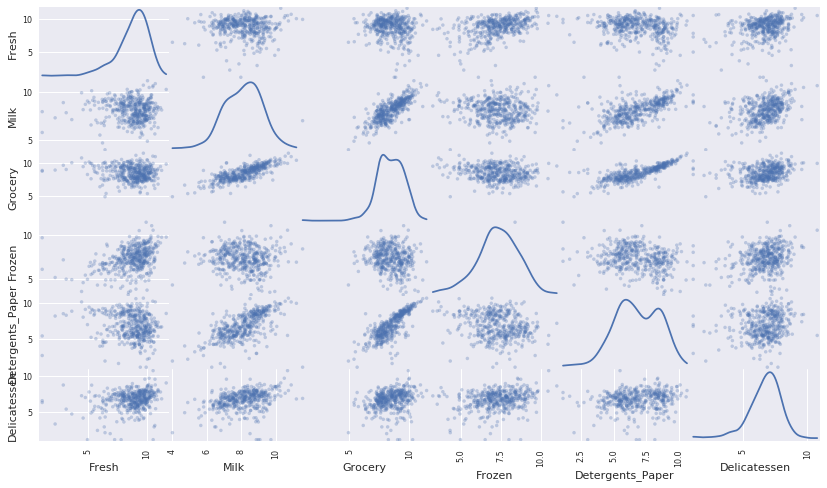

In [63]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

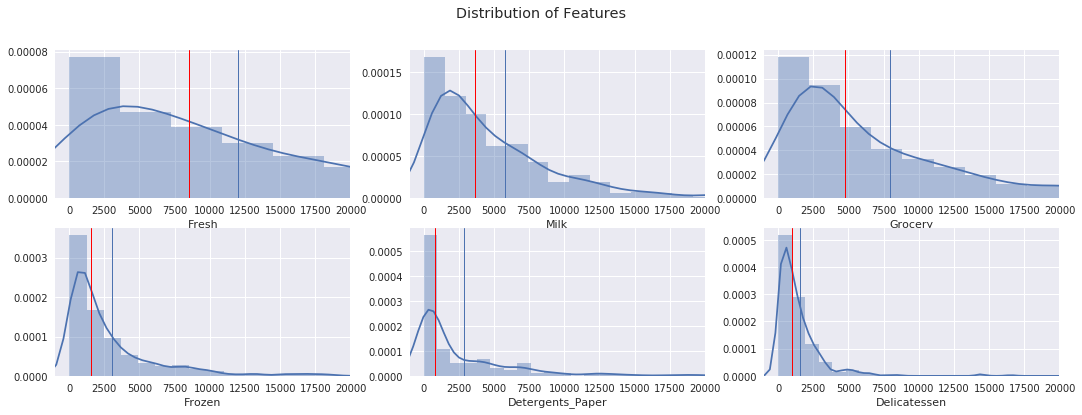

In [64]:
fig, axes = plt.subplots(2, 3)
axes = axes.flatten()
fig.set_size_inches(18, 6)
fig.suptitle('Distribution of Features')

for i, col in enumerate(data.columns):
    feature = data[col]
    sns.distplot(feature, label=col, ax=axes[i]).set(xlim=(-1000, 20000),)
    axes[i].axvline(feature.mean(),linewidth=1)
    axes[i].axvline(feature.median(),linewidth=1, color='r')

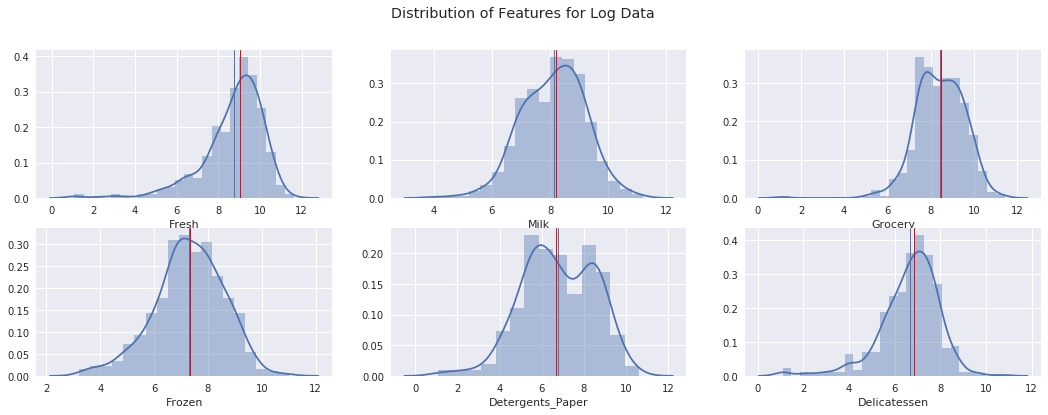

In [65]:
fig, axes = plt.subplots(2, 3)
axes = axes.flatten()
fig.set_size_inches(18, 6)
fig.suptitle('Distribution of Features for Log Data')

for i, col in enumerate(log_data.columns):
    feature = log_data[col]
    sns.distplot(feature, label=col, ax=axes[i])
    axes[i].axvline(feature.mean(),linewidth=1)
    axes[i].axvline(feature.median(),linewidth=1, color='r')

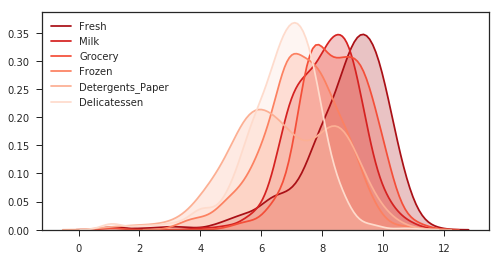

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
# set plot style & color scheme
sns.set_style('ticks')
with sns.color_palette("Reds_r"):
    # plot densities of log data
    plt.figure(figsize=(8,4))
    for col in data.columns:
        sns.kdeplot(log_data[col], shade=True)
    plt.legend(loc='best')

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [67]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.028455,9.490998,10.048756,8.279190,9.206232,6.594413
2,10.299003,9.396903,9.682030,9.483036,5.204007,7.698029


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](https://www.kdnuggets.com/2017/01/3-methods-deal-outliers.html): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [68]:
for feature in log_data.keys():
    data[feature]

In [69]:
# For each feature find the data points with extreme high or low values
data_outliers = []
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    feature_outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    data_outliers += feature_outliers.index.tolist()
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = data_outliers
outliers.sort()
print("All outliers data: ", outliers)

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


All outliers data:  [38, 57, 65, 65, 66, 66, 75, 75, 81, 86, 95, 96, 98, 109, 128, 128, 137, 142, 145, 154, 154, 154, 161, 171, 175, 183, 184, 187, 193, 203, 218, 233, 264, 285, 289, 304, 305, 325, 338, 343, 353, 355, 356, 357, 412, 420, 429, 439]


In [70]:
def feature_outliers(dataframe, col, param=1.5):
    Q1 = np.percentile(dataframe[col], 25)
    Q3 = np.percentile(dataframe[col], 75)
    tukey_window = param*(Q3-Q1)
    less_than_Q1 = dataframe[col] < Q1 - tukey_window
    greater_than_Q3 = dataframe[col] > Q3 + tukey_window
    tukey_mask = (less_than_Q1 | greater_than_Q3)
    return dataframe[tukey_mask]

def multiple_outliers(dataframe, count=2):
    raw_outliers = []
    for col in dataframe:
        outlier_df = feature_outliers(dataframe, col)
        raw_outliers += list(outlier_df.index)

    outlier_count = Counter(raw_outliers)
    outliers = [k for k,v in outlier_count.items() if v >= count]
    return outliers
print(outliers)

[38, 57, 65, 65, 66, 66, 75, 75, 81, 86, 95, 96, 98, 109, 128, 128, 137, 142, 145, 154, 154, 154, 161, 171, 175, 183, 184, 187, 193, 203, 218, 233, 264, 285, 289, 304, 305, 325, 338, 343, 353, 355, 356, 357, 412, 420, 429, 439]


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:
1. Yes, if you look at index 65, 66, 75, 128... Those data points considered as outliers for more than one features.
2. Yes, I think we should remove those data poitns from the dataset.
3. The reason is that those data points are abnormal and falling out of the reasonable range. The K-means clustering is very sensitive to the outliers. Actually, those outliers will be ignored if we appy the PCA later I think. If you look at the 'Fresh' feature, whihc is the feature with most outliers. There are 16 data points, which is only 3.6% of the data (16/440) are outliters. This means that the outliers is just the minor amount of the data. It's safe to remove them.**


4. QUESTION --- (a) The tutorial mentioned to use MaxMin method for feature scaling, and here we are using Logarithmic, I am wondering which one is better and which one we should use. (b). On the data process above, shouldn't we detect outliers and remove the ourliers it before rescaling the data?  

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

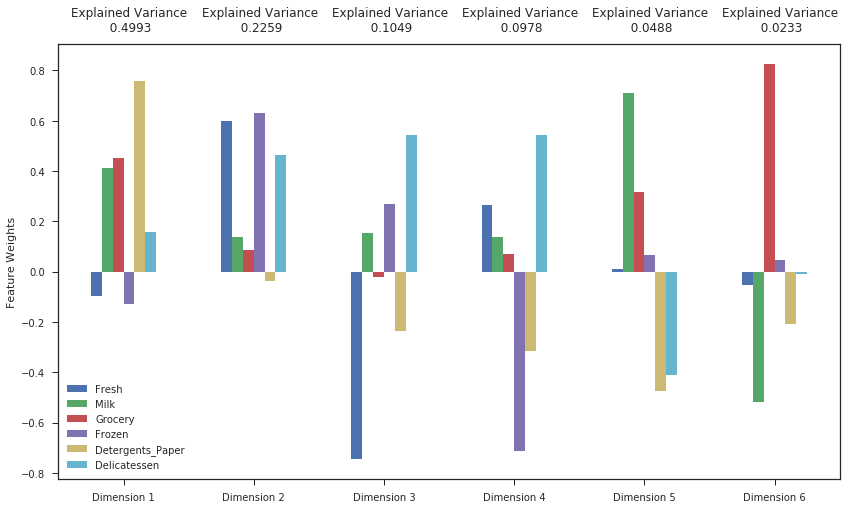

In [71]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

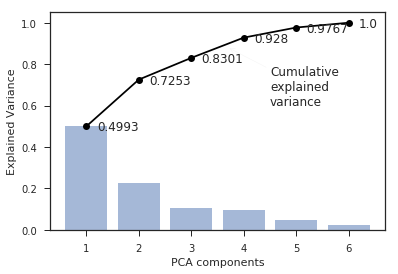

In [72]:
# create an x-axis variable for each pca component
x = np.arange(1,7)

# plot the cumulative variance
plt.plot(x, np.cumsum(pca.explained_variance_ratio_), '-o', color='black')

# plot the components' variance
plt.bar(x, pca.explained_variance_ratio_, align='center', alpha=0.5)

# plot styling
plt.ylim(0, 1.05)
plt.annotate('Cumulative\nexplained\nvariance',
             xy=(3.7, .88), arrowprops=dict(arrowstyle='->'), xytext=(4.5, .6))
for i,j in zip(x, np.cumsum(pca.explained_variance_ratio_)):
    plt.annotate(str(j.round(4)),xy=(i+.2,j-.02))
plt.xticks(range(1,7))
plt.xlabel('PCA components')
plt.ylabel('Explained Variance')
plt.show()

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:
1. 72.52% variance in the data is explained by the first and second principal component.
2. 92.79% variacne in the data is explained by the first four principal components.
3. For the first dimension, "Detergent Papers" dominates the represnetation of this dimension. The "Milk" and "Grocery" features are contributing some certain amount of the features as well. You can notice that the first component can barely predict "Fresh" and "Frozen". However, if you look at the second componenet, since it is orthogonal to the first component, the "Fresh" and the "Frozen" are the two features that contribute most for it. The third and fourth component rely on "Delicatessen". I think The frist component could be the restaurant or beverage shop. The second component could be the breakfast deli store. The third component could be local convenient store.
The fourth component could be the drive through deli store next to the gas station. **

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [73]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1.7793,-0.6604,-0.8247,1.6580,0.0903,-0.4808
1,3.0820,0.1314,0.3994,-1.4197,0.4747,0.2263
2,-0.3633,2.8718,0.5600,0.1526,1.8366,0.7275


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [74]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [75]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,1.7793,-0.6604
1,3.0820,0.1314
2,-0.3633,2.8718


In [76]:
# Question -  Why are them the same with 6 dimention. 

## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

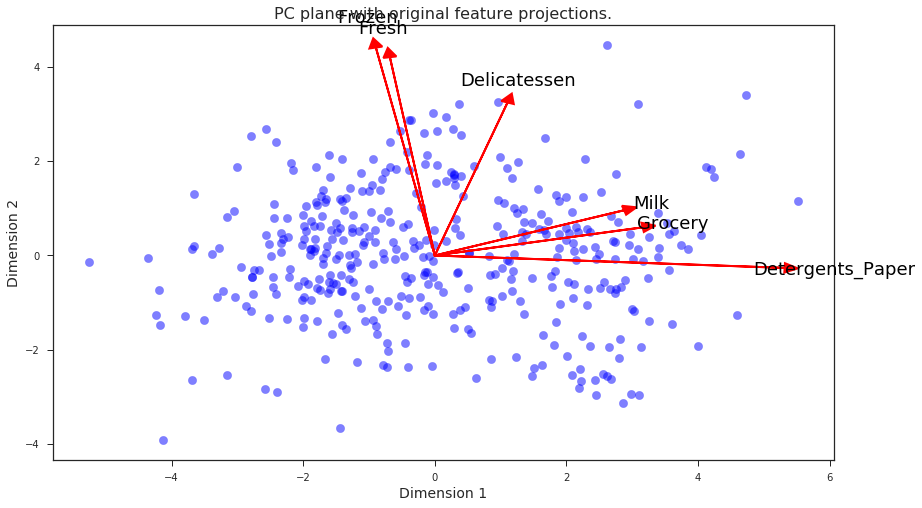

In [77]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:
1. The advantages of using K-Means clustering: (a). K-means are faster and more efficient to use especailly when the dataset is larger and the feature dimension is high. (b). Work well with high dimension of data and do not worry too much for the initialization. (c). Easy to interpret.

2. The advantages of using Gaussian Mixture Model: (a). GMM is able to handle non-spherical shape data. (b). K-means is hard assignemnt, which means that there is no probability of data samples provided, and the data distribution data shape is unknown. However, GMM is soft clustering and is able to provide those information. (c). Does not assume clusters to be spherical and can work well with different shape of the data.

3. I would use GMM. The reasons are (1). The data does not look like a sphere shape, and it looks like a normal distribution shape after we ignore the outliers data. (2). The model is complicated so there might be some hidden information inside the model. It's better to use GMM since it is soft clustering by assigning a probability to each point to belong to the clusters. (3). GMM is more flexible in terms of cluster covariance. K-means is actually only a special spherical case of GMM.  **

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [78]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score


def clustering_cal(n_clusters):
    scores = []
    for number in n_clusters:
        cluster = GaussianMixture(n_components=number, random_state=0).fit(reduced_data)

        # TODO: Predict the cluster for each data point
        preds = cluster.predict(reduced_data)

        # TODO: Find the cluster centers
        centers = cluster.means_

        # TODO: Predict the cluster for each transformed sample data point
        sample_preds = cluster.predict(pca_samples)

        # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
        # silhouette_avg = silhouette_score(X, cluster_labels)
        score = silhouette_score(reduced_data, preds)
        scores.append(score)
    return scores
    
n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
result = clustering_cal(n_clusters)
print("The result of sillhouette score for different numbers of clusters (2 to 10) are : ", result)

# The optimal number of the cluster = 2
cluster = GaussianMixture(n_components=2, random_state=0).fit(reduced_data)
preds = cluster.predict(reduced_data)
centers = cluster.means_
sample_preds = cluster.predict(pca_samples)

The result of sillhouette score for different numbers of clusters (2 to 10) are :  [0.44675352694453702, 0.35256124857585935, 0.31513757092009265, 0.31356874310508004, 0.338434872317811, 0.24986621117251637, 0.31992193477574316, 0.34377264264977192, 0.31683966634168503]


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:

1. The result of sillhouette score for different numbers of clusters (2 to 10) are :  [0.44675352694453702, 0.36119362503867258, 0.30446369931822093, 0.30627130078225068, 0.29314548379062988, 0.33370236597913594, 0.28666814566234711, 0.29982897472065251, 0.32889235370108988]
2. The best result is 0.44, which is using 2 clusters.**

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

[1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0
 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0
 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1
 1 1 1 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1
 1 0 1 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 1 1 0 0 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0]
[[-1.26441765  0.16908975]
 [ 2.09897893 -0.28069508]]


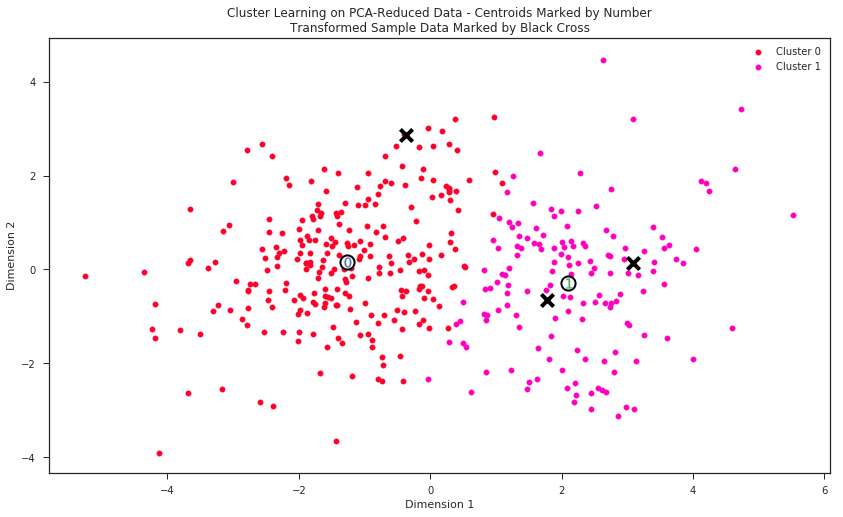

In [79]:
# Display the results of the clustering from implementation
print(preds)
print(centers)
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [80]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9494.0,2049.0,2598.0,2203.0,337.0,796.0
Segment 1,5219.0,7671.0,11403.0,1079.0,4413.0,1099.0


([<matplotlib.axis.XTick at 0x7fb634226cc0>,
 <a list of 4 Text xticklabel objects>)

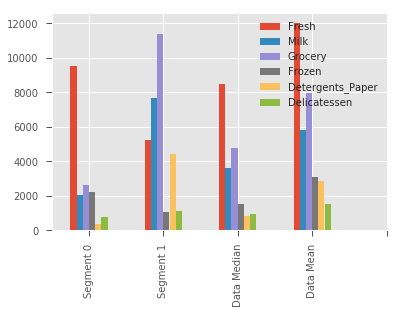

In [81]:
centers = true_centers.copy()
centers.loc[centers.shape[0]] = data.median()
centers.loc[centers.shape[0]] = data.mean()

plt.style.use('ggplot')
centers.plot(kind='bar')
labels = true_centers.index.values.tolist()
labels.append("Data Median")
labels.append("Data Mean")
plt.xticks(range(centers.shape[0]+1),labels)

### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

In [82]:
#print(true_centers)
true_centers- data.mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-2506.297727,-3747.265909,-5353.277273,-868.931818,-2544.493182,-728.870455
Segment 1,-6781.297727,1874.734091,3451.722727,-1992.931818,1531.506818,-425.870455


**Answer:
For the Segment 0, all of the mean values of six features are lower than the mean values of all dataset. And the Fresh category expense is 9494 dollors, which is the highest one. This could mean that this is a local restaurant and most likely they are producing their own ingredient. 


For the Segment 1, the mean values of Fresh, Frozen, and delicatessen are lower and the Milk and Grocery mean values are higher than the mean values of all dataset. This could mean that this type of establishment does not need Fresh and Frozen stuffs but  do spend a lot on the Grocery and Milk. This type of establishment could be a Grocery product (especially Milk product) distributors.

**

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [83]:
# Display the predictions
print(sample_preds)
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

[1 1 0]
Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


**Answer:
1. I mentioned that the Sample 0 spend a lot on Milk and Grocery and spend less on other categories, which is matching the Cluster 1. The Sample 1 spend a lot on Milk, Grocerya dn Detergents Paper, which is  most likely to be the Cluster 1 as well. The Sample 2 spend a lot on Fresh, Milk, Grocery and Frozen than average, I think this belongs to Cluster 1 also because for Cluster 1, the customer type is more like spending less on every single categories.

2. Not exactly match. I successfully predict the Sample 0 and Sample 1. However, for the Sample 2, the result is not matching the clustering result.
**

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer: Since we have two separated clusters of customers (Local Restaurant and Grocery Product Distributor), the wholesale disbributor could first make the assumption that the local restaurant group is not going to be happy about the new 3 days a week deliveryi service because the restaurant alwayws want the ingredient fresh. On the other hand, the Grocery Product Distributor might be fine with it because they are able to keep and store things nicely. The wholesale disbributor then can apply A/B test on both two groups and confirm if this assumption is correct. When we apply the A/B tests for both group, since we have already known that the characteristic of the customers in a group is going to be similar, we just need to take a subset of each group to perform the A/B tests and then we can safely assume that the result is good enough to represent the whole group of the customers. This is one of the benefit that we have clustered the data beforehand.** 

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:
I think there are three ways:

1. Approach 1: Apply the GMM model to the 10 new customer data to predict which cluster of each data belongs to. Since we already know that which cluter represents being happy and unhappy about the new 3 days delivery service, we can determine if those 10 new customers are going to be accepting the 3 days delivery serice or not.


2. Approach 2: Use the product spending info as features and the clustering result as target label to train a supervised learning algorithm (SVM, Logistic regression, Adaboost...). After the model is built, we apply this model to those 10 new customer and see which class that those new data belong to. Then we are able to know that if this customer likes  3 days delivery service or not.

3. Approach 3: First, use the clustering result as a data feature (0 and 1 to represnet different cluster) so that our data (the existing data and new 10 customer data) has spending features and "customer segment" features. Second, we then use the existing data to train a supervised model with customer segment clustered result as target label. In the end we apply the new 10 customer data to this model for prediction (noted that thoes 10 customer data has spending features and "customer segment feature). 

P.S. I am actually not so sure about this approach since I don't know if it is okay to have "customer segment" in input features and target output at the same time from machine learning perspective. Please let me know if this approach is acceptable. **

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

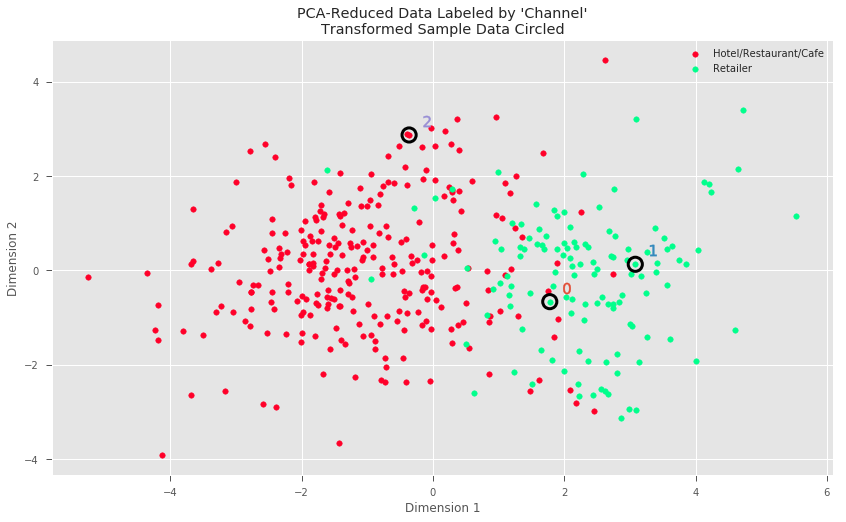

In [84]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:

1. Based on the the previous result: Sample point 0 and Sample point 1 predicted to be in Cluster 1 (grocery distributor), and Sample point 2 predicted to be in cluster 0 (local restaurant). This seems to match from the plot above. 

2. Yes, the points less the -2 in dimension 1 seem to be purely red, which is Hotel/Restaurant/Cafe. The points greater than 4 in dimension 1 seem to be purely green, which is retailer.

3. Yes, the classifications is consistent with my previous difinition of the customer segments. 


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.